# Life Expectancy and GDP
### A Codecademy Captsone Project

This portfolio project is part of Codecademy's Data Science career path. It uses data that Codecademy gathered from the World Health Organization and the World Bank to investigate the links between Gross Domestic Product (GDP) and life expectancy at birth for six countries. To determine whether the two features are in fact positively correlated I've plotted  life expectancy vs. GDP for all six nations. Then fitted a trendline to the life expectancy vs. GDP data. I also investigate the average life expectancy of the six countries as well has how that life expectancy changed over a 15-year period.

GitHub will have my code to show how I approached the project and the database given by Codecademy in the repository. The data itself is limited, it contains 16 GDP/life expectancy data points for 6 nations. These are the specific questions to address this project:

What is the average life expectancy in the six nations?
What does the life expectancy distribution of each nation look like?
Has life expectancy increased over time in the six nations?
Has GDP increased over time in these nations?
Is there a correlation between GDP and life expectancy of a country?

## Importing the Data and Various Python Packages

Below I'm importing the data as well as various Python packages to aid the analysis.

In [2]:
# Import general data analysis and plotting packages:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Import correlation-testing functions:
from scipy.stats import pearsonr, spearmanr

# Import linear reression method:
from sklearn.linear_model import LinearRegression

## Investiage the Data

Codecademy states that the data has already been processed, but that doesn't mean that it can't be altered further to assist us with this analysis. 

In [3]:
# Import the data itself provided by Codecademy:
alldata = pd.read_csv('all_data.csv')

# Display the first few rows of the DataFrame
print(alldata.head())

# Check the data types and missing values
print(alldata.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


There are only two modifications that I would like to make to this data. The first is modifying the column names.

In [4]:
# Rename the columns:
alldata.rename(columns = {'Country':'country', 'Year': 'year','Life expectancy at birth (years)': 'life_expect_at_birth', \
                          'GDP': 'gdp'}, inplace = True)

The second is making new columns from the 'gdp'. Presently, this column contains large numerical values that might distort the visual representations during analysis. The first column will contain GDP in billions, while the second GDP in trillions

In [5]:
# Make a new column that is GDP/10^9:
alldata['gdp_bil'] = alldata.gdp / 1000000000

# Make another new column that is GDP/10^12:
alldata['gdp_tril'] = alldata.gdp / 1000000000000

Let's check the updated columns

In [6]:
# Print the updated DataFrame information:
print(alldata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               96 non-null     object 
 1   year                  96 non-null     int64  
 2   life_expect_at_birth  96 non-null     float64
 3   gdp                   96 non-null     float64
 4   gdp_bil               96 non-null     float64
 5   gdp_tril              96 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.6+ KB
None


There are two questions that I would like to investigate before beginning the analysis:
*What years does the data span?
*How many data points per country? And which specific 6 countries will I be dealing with?

In [7]:
# Print the maximum and minimum of the "year" column:
print("Starting year: " + str(alldata.year.min()) + "; Ending year: " + str(alldata.year.max()))

# Print the value counts of the unique country names included in the DataFrame:
print(alldata.country.value_counts())

Starting year: 2000; Ending year: 2015
country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


Let's analyze the data that we see. The provided DataFrame corresponds to fifteen years worth of data. All six countries have sixteen data points. Meaning that there is no missing data. Besides the US and Mexico every other country is in it's own continent. I did a quick google search to see if these countries have anything in common. They are all a part of WEO Groups(World Economic Outlook), which are divided into two categories: 'advanced economies' and 'emerging and developing economies'. China, Germany, and the US take part of the former. Chile, Mexico and Zimbabwe the latter. This leads me to predict that the second group will have a greater increase in GDP as the first group are more 'established'.

## Visualizing the Data

### Life expectancy at Birth over Time

**Bar Plot of Average Life Expectancy at Birth**

The average life expectancy at birth will be visualized as a bar plot. This will visualize any differences between all six of the countries represented.

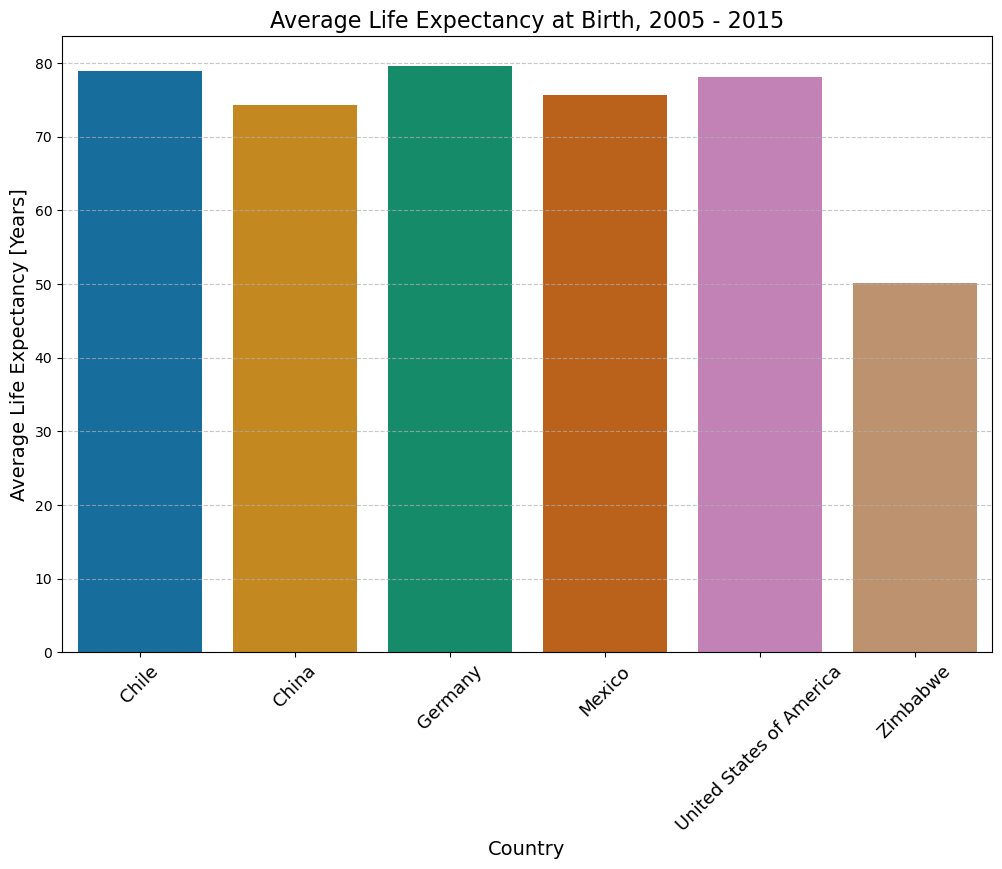

<Figure size 640x480 with 0 Axes>

In [8]:
# Calculate average life expectancy for each country
average_life_expectancy = alldata.groupby('country')['life_expect_at_birth'].mean()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=average_life_expectancy.index, y=average_life_expectancy.values, palette='colorblind')
plt.title('Average Life Expectancy at Birth, 2005 - 2015', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Life Expectancy [Years]', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('fig_2_avg_life_expect.png')

In [10]:
# Calculate the average life expectancy for each country
average_life_expectancy = alldata.groupby('country')['life_expect_at_birth'].mean()
print(average_life_expectancy)

country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expect_at_birth, dtype: float64


Except for Zimbabwe, whose avg life expectancy is around 50.09 yrs, the remaining five countries have a similar avg life expectancy. Germany has the highest avg, 79.65, while China has the lowest of the comparable five, 74.26.

**Box-and-whisker Plot**
A box-and-whisker plot in my opinion would allow us to visually see the distribution of our continuous variable, life expectancy, for our countries category. Since the data is limited, this type of plot gives the probability that a given life expectancy value will lie in some particular range.

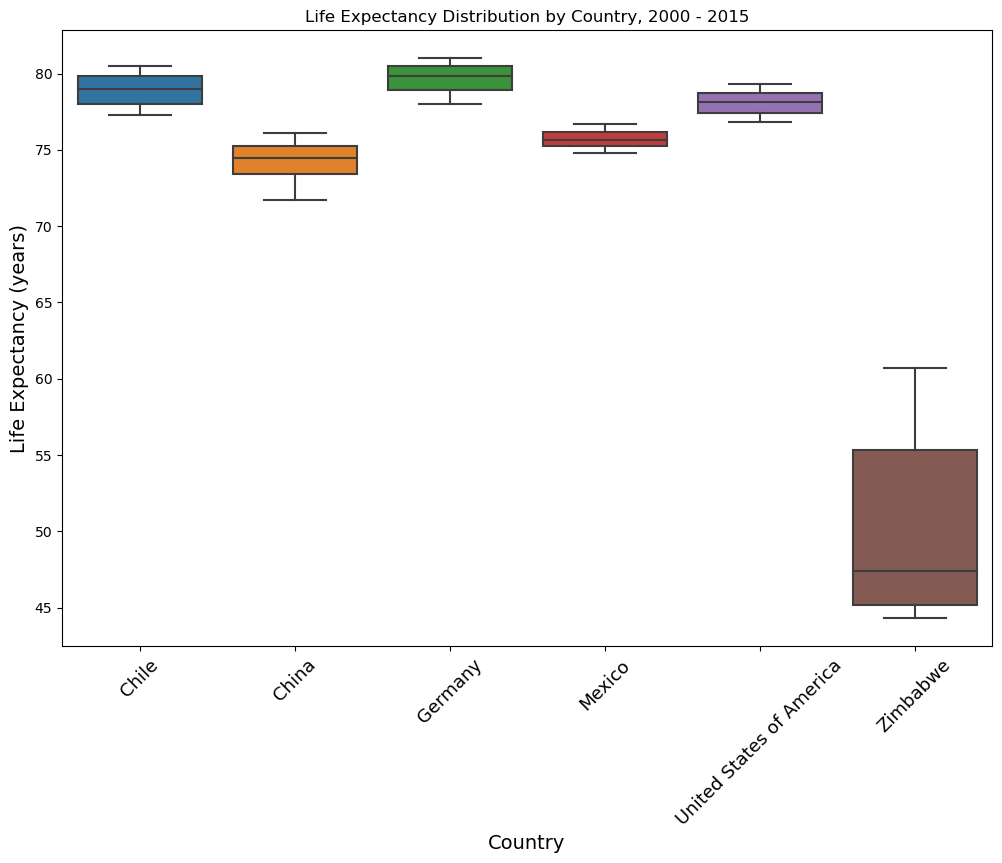

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the distribution of life expectancy for each country
plt.figure(figsize=(12, 8))
sns.boxplot(data=alldata, x='country', y='life_expect_at_birth')
plt.title('Life Expectancy Distribution by Country, 2000 - 2015')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Life Expectancy (years)', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.show()
plt.savefig('fig_3_life_expectancy_distribution.png')

I would think that the positive variability in Zimbabwe's plot means that more of their citizens will eventually expect to live on average longer than 60 yrs. Looking at the median line in the box-and-whisker plot, it looks to be a bit off compared to the avg represented in the standard box plot. Let's go ahead and calculate the standard deviation for all the countries.

In [15]:
# Calculate the standard deviation of life expectancy at birth for each country
std_life_expectancy = alldata.groupby('country')['life_expect_at_birth'].std()

# Print the standard deviation for each country
print(std_life_expectancy)


country
Chile                       1.058911
China                       1.318016
Germany                     0.975000
Mexico                      0.620987
United States of America    0.832566
Zimbabwe                    5.940311
Name: life_expect_at_birth, dtype: float64


As expected, Zimbabwe has a significantly higher variability with a standard deviation of approximately 5.94 yrs. I am surprised to see that Mexico has a standard deviation of 0.62 yrs. Unfortunately, we don't have more data to explore why this might be the case.

**Highlighting Trend of Life Expectancy at Birth**
The next plot is to show the trend of life expectancy at birth. This will not be a plot to compare the nations, simply to highlight any trends. I've allocated each country to its own plot, to improve the visualization of any trends.

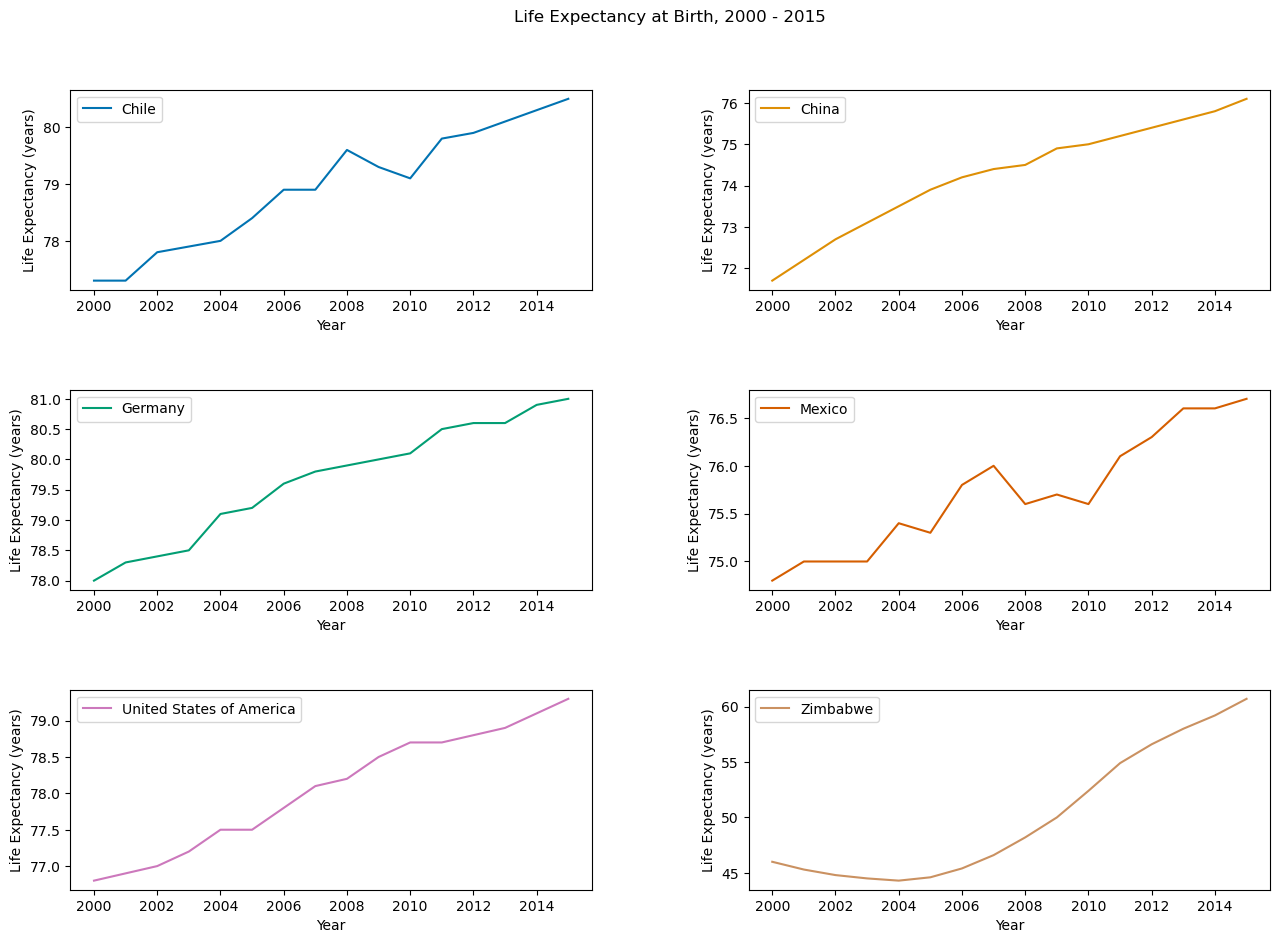

<Figure size 640x480 with 0 Axes>

In [32]:
# Plot the trend of life expectancy over time for each country
# Set the figure size
plt.figure(figsize=(15, 10))

# Define the countries
countries = alldata['country'].unique()

# Create a colorblind-friendly palette
palette = sns.color_palette("colorblind", len(countries))

# Create subplots for each country
for i, country in enumerate(countries, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=alldata[alldata['country'] == country], x='year', y='life_expect_at_birth', color=palette[i-1], label=country)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (years)')
    plt.legend(loc='upper left')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
    
# Single Title
plt.suptitle('Life Expectancy at Birth, 2000 - 2015')
# Show the plots
plt.show()
plt.savefig('fig_4_life_expectancy_over_time.png')


Both Mexico and Chile had a small dip in the life expectancy of their citizens around the same time, 2007-2010. I wonder if being a Latin country is a reason for this since the life expectancy of the US, during the same time, continued to increase. It's positive to see the substantial increase Zimbabwe has seen from 2004 to 2015. Other countries with low life expectancy should examine the successful strategies of nations such as Germany and China, aiming to emulate their achievements. But following Zimbabwe's incremental approach, they can implement gradual steps towards improvement. The final take away is that there has been an increase of life expectancy for each country.

### Life Expectancy at Birth as a Function of GDP

The scatter plot below will not be comparing the nations to one another. Rather, a comparison of how GDP and Life Expectancy are correlated in that country. Some can expect that the higher a countries GDP is, their citizens will expect to have a higher life expectancy. This is because their country can afford to spend on, better health care. In order to validate for positive, negative or not correlation between life expectancy and GDP, scatterplots will have a linear trend line. Additionally, a Pearson correlation coefficient will be utilized for a secondary verification.

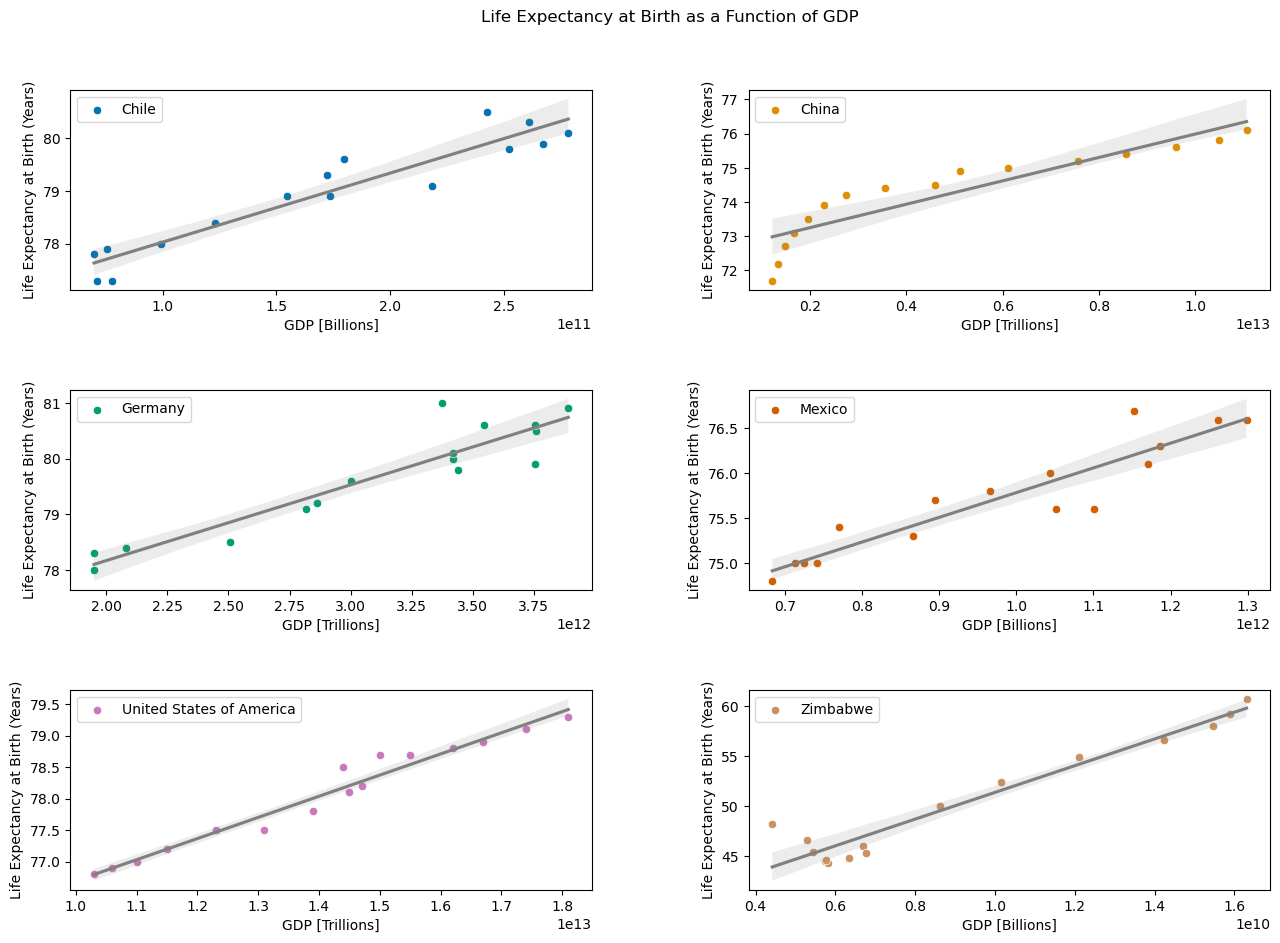

<Figure size 640x480 with 0 Axes>

In [47]:
# Plot the trend of life expectancy at birth as a function of GDP
# Set the figure size
plt.figure(figsize=(15, 10))

# Define the countries
countries = alldata['country'].unique()

# Create a colorblind-friendly palette
palette = sns.color_palette("colorblind", len(countries))

# Create subplots for each country
for i, country in enumerate(countries, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=alldata[alldata['country'] == country], x='gdp', y='life_expect_at_birth', color=palette[i-1], label=country)
    sns.regplot(data=alldata[alldata['country'] == country], x='gdp', y='life_expect_at_birth', scatter=False, color='gray')
    gdp_value = alldata[alldata['country'] == country]['gdp_bil'].iloc[0]
    if gdp_value >= 1000:
        unit = 'Trillions'
        gdp_value /= 1000  # Convert to trillions
    else:
        unit = 'Billions'
    plt.xlabel(f'GDP [{unit}]')
    plt.ylabel('Life Expectancy at Birth (Years)')
    plt.legend(loc='upper left')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)

# Single Title
plt.suptitle('Life Expectancy at Birth as a Function of GDP')

# Show the plots
plt.show()
plt.savefig('fig_5_life_expectancy_gdp.png')



In [53]:
# Import the necessary function
from scipy.stats import spearmanr

# Calculate correlation coefficients
correlation_coefficients = {}
for country in countries:
    # Determine which GDP column to use based on the country
    gdp_column = 'gdp_tril' if alldata[alldata['country'] == country]['gdp_tril'].iloc[0] >= 1 else 'gdp_bil'
    
    # Calculate Pearson correlation coefficient
    pearson_corr, _ = pearsonr(alldata[alldata['country'] == country]['life_expect_at_birth'], alldata[alldata['country'] == country][gdp_column])
    
    # Calculate Spearman correlation coefficient
    spearman_corr, _ = spearmanr(alldata[alldata['country'] == country]['life_expect_at_birth'], alldata[alldata['country'] == country][gdp_column])
    
    # Store the results
    correlation_coefficients[country] = {'Pearson': round(pearson_corr, 3), 'Spearman': round(spearman_corr, 3)}

# Print correlation coefficients
print("Correlation Coefficients:")
for country, coeffs in correlation_coefficients.items():
    print(f"For {country}: Pearson = {coeffs['Pearson']}, Spearman = {coeffs['Spearman']}")


Correlation Coefficients:
For Chile: Pearson = 0.95, Spearman = 0.928
For China: Pearson = 0.909, Spearman = 1.0
For Germany: Pearson = 0.933, Spearman = 0.845
For Mexico: Pearson = 0.932, Spearman = 0.919
For United States of America: Pearson = 0.982, Spearman = 0.99
For Zimbabwe: Pearson = 0.966, Spearman = 0.753


Since all coefficients are positive between GDP and life expectancy at birth we'll leave the scatterplot as is(otherwise it wouldn't make sense to leave a trend line there or maybe it would to show that there isn't one. I don't know, I'm still new to this). More specifically, the output for China indicates an very strong positive linear relationship between the variables, as both the Pearson and Spearman correlation coefficients approach 1.0. Although positive, I'm not quite sure what to make of Zimbabwe's Spearman correlation coefficient of 0.753 or at the very least what attributes to this data point.